In [ ]:
# !pip install qiskit
# !pip install pylatexenc

In [15]:
import numpy as np
from numpy import pi
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
# provider = IBMQ.load_account()
# Simple colab test

In [27]:
#Define projectors

''' If the number of qubits that P_left acts upon is always the same number
    as the number of all qubits in the circuit, one of the arguments is
    redundant and could be easily removed. '''

def P_left(c, n, phi):
    qc = QuantumCircuit(c)
    
    for q in range(n-1):
        qc.x(q)
    qc.mcx(list(range(0, n-1)), n-1)

    '''Because the rotation is only done on the last qubit, this and the marked line cancel out'''
    # for q in range(n-1):
    #     qc.x(q)
        
    #qc.barrier(0, 1, 2, 3)
    qc.rz(phi, n-1)
    #qc.barrier(0, 1, 2, 3)
    
    ''' This is the marked line '''
    # for q in range(n-1):
    #     qc.x(q)

    qc.mcx(list(range(0,n-1)),n-1)
    for q in range(n-1):
        qc.x(q)
    
    p_left_gate = qc.to_gate()
    p_left_gate.name = "P$_L$(Φ)"
    return p_left_gate

def P_right(phi):
    qc = QuantumCircuit(2)
    
    qc.cx(0, 1)
    qc.rz(phi, 1)
    qc.cx(0 ,1)
    
    p_right_gate = qc.to_gate()
    p_right_gate.name = "P$_R$(Φ)"
    return p_right_gate

In [28]:
#Define Oracle Unitary and dagger

def U(c, n):
    qc = QuantumCircuit(c)
    
    for q in range(n-2):
        qc.h(q)
        
    qc.mcx(list(range(0, n-2)), n-2)
    
    U_gate = qc.to_gate()
    U_gate.name = "U"
    return U_gate

def reverse_gate(gate):
    gate_rev = gate.reverse_ops()
    gate_rev.name = gate.name + "$^†$"
    return gate_rev

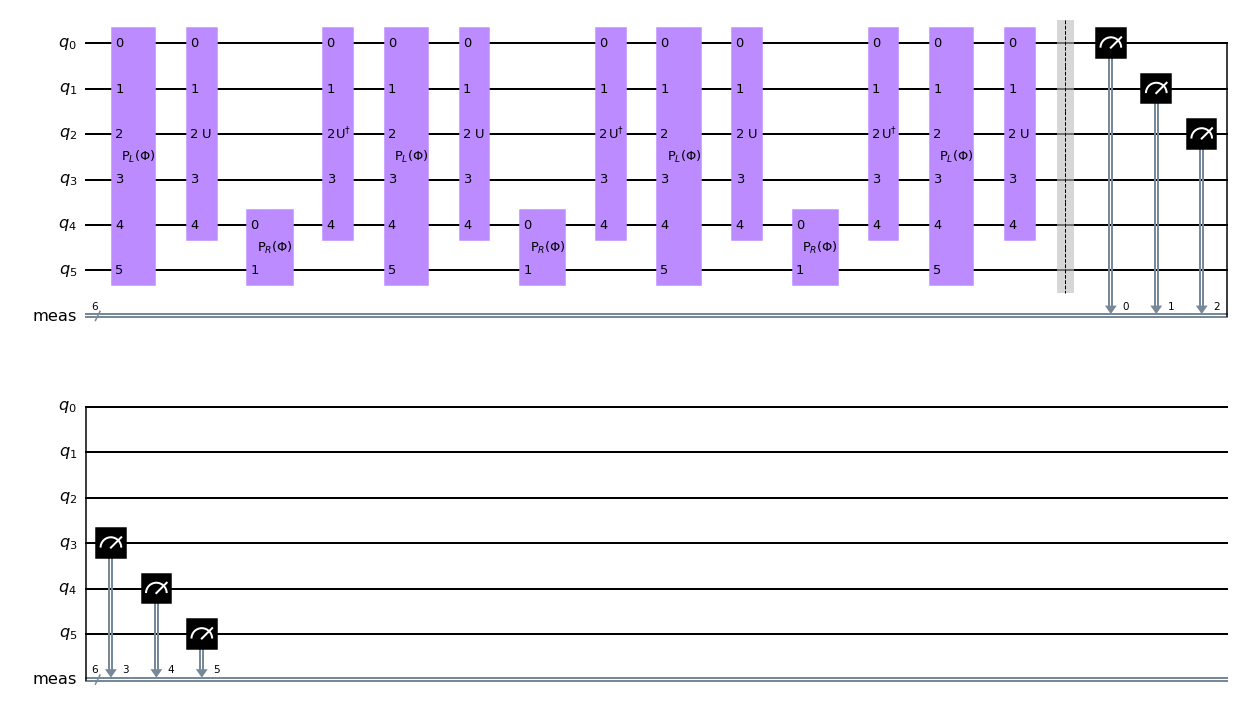

In [31]:
systemqubits = 4
nqubits = systemqubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)  

d = 2*systemqubits - 1

# TODO: Check if works the same for systemqubits >= 10 
if systemqubits > 6:
  for i in range(1, systemqubits - 6 + 1):
    d += 2 * i

u = U(nqubits-1, nqubits)
u_dag = reverse_gate(u)
p_right = P_right(pi)
p_left = P_left(nqubits, nqubits,pi)

p_right_range = [nqubits-2, nqubits-1]
u_range = list(range(0, nqubits-1))
p_left_range = list(range(0, nqubits))

circuit.append(P_left(nqubits, nqubits, (1-d)*pi/2), p_left_range)
circuit.append(u, u_range)

for i in range(0, int((d-1)/2)):
    #TODO: debug this, doesnt work just as a 2 qubit gate
    circuit.append(p_right, p_right_range) 
    circuit.append(u_dag, u_range)
    circuit.append(p_left, p_left_range)
    circuit.append(u, u_range)

circuit.measure_all()
circuit.draw(output='mpl')

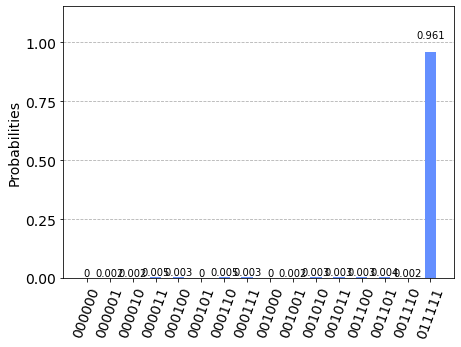

In [32]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

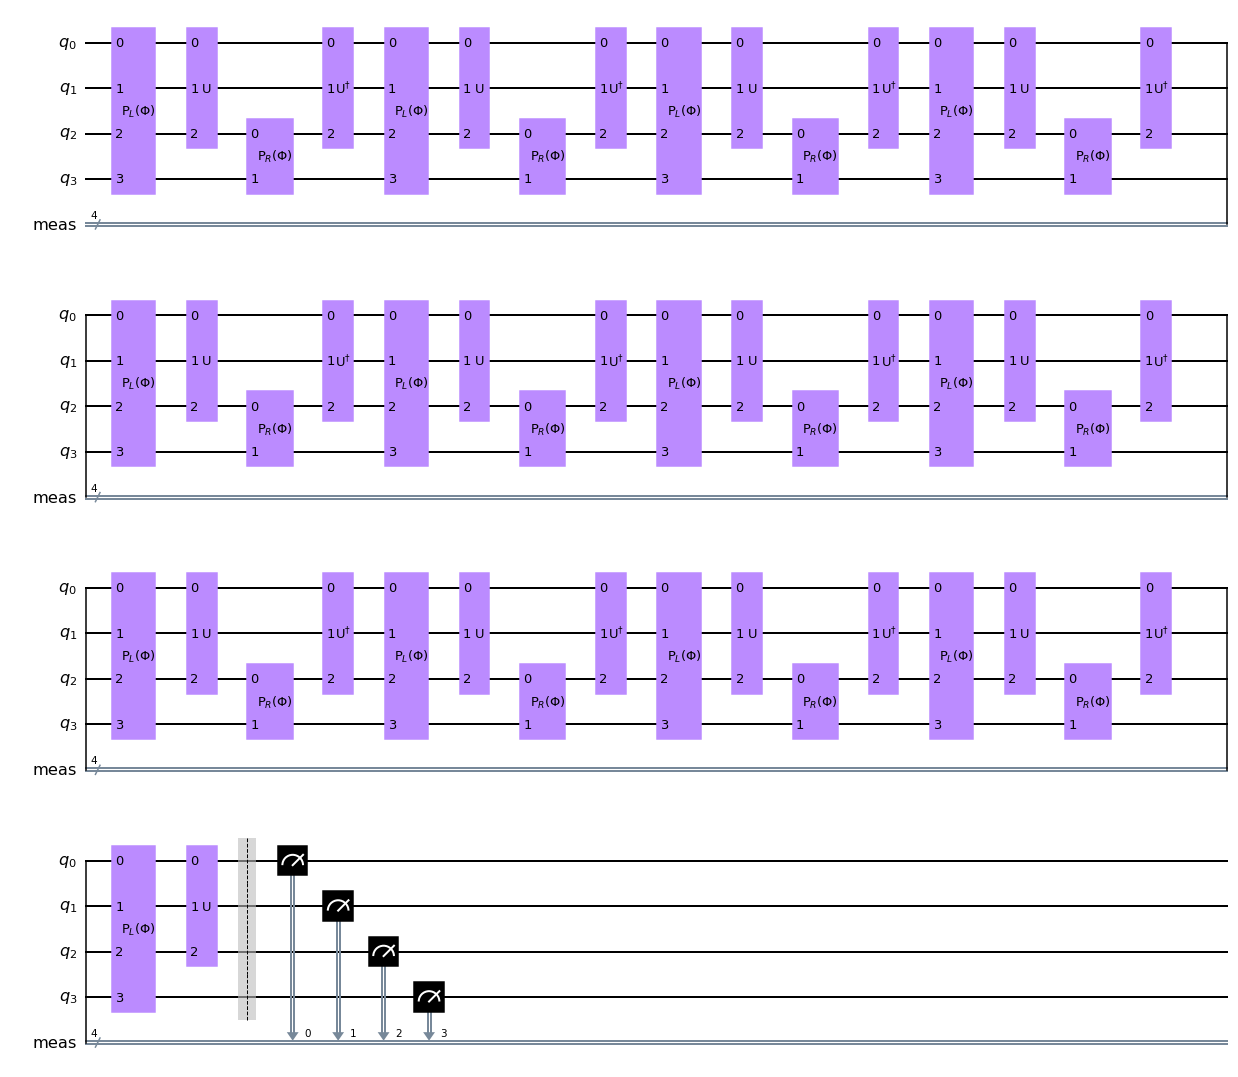

In [36]:
fi = [-0.00228511 ,1.57336133,  1.56788784,  1.57412054,  1.56697361,  1.57521311,
  1.56567456,  1.57675259,  1.5638536,   1.57890486,  1.56130902,  1.5819173,
  1.55773369,  1.58617755,  1.55262773,  1.59234794,  1.54508368,  1.60172344,
  1.53316035,  1.61739434,  1.51155042,  1.64944976,  1.45797163,  1.76193637,
 -0.57815011]

systemqubits = 2
nqubits = systemqubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)

u = U(nqubits-1, nqubits)
u_dag = reverse_gate(u)

p_right_range = [nqubits-2, nqubits-1]
u_range = list(range(0, nqubits-1))
p_left_range = list(range(0, nqubits))

circuit.append(P_left(nqubits, nqubits, fi[0]), p_left_range)
circuit.append(u, u_range)

''' len(fi) - 1 is an educated guess :)) '''
for i in range(1, len(fi) - 1, 2):
  circuit.append(P_right(fi[i]), p_right_range)
  circuit.append(u_dag, u_range)
  circuit.append(P_left(nqubits, nqubits, fi[i+1]), p_left_range)
  circuit.append(u, u_range)

circuit.measure_all()
circuit.draw(output="mpl")

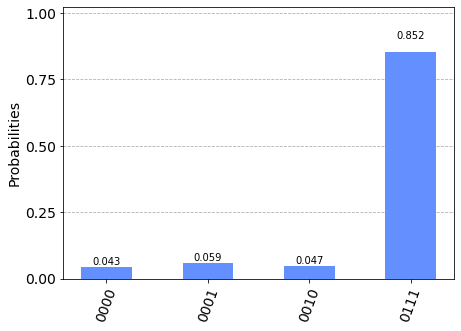

In [37]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [38]:
fi.reverse()
print(fi)

[-0.57815011, 1.76193637, 1.45797163, 1.64944976, 1.51155042, 1.61739434, 1.53316035, 1.60172344, 1.54508368, 1.59234794, 1.55262773, 1.58617755, 1.55773369, 1.5819173, 1.56130902, 1.57890486, 1.5638536, 1.57675259, 1.56567456, 1.57521311, 1.56697361, 1.57412054, 1.56788784, 1.57336133, -0.00228511]


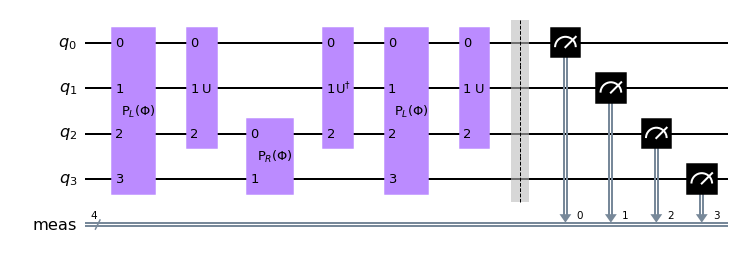

In [60]:
tot = [2*1.57079648, 2*1.57077135, 2*1.57275266, 2*1.5638175]

systemqubits = 2
nqubits = systemqubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)  

u = U(nqubits-1, nqubits)
u_dag = reverse_gate(u)

p_right_range = [nqubits-2, nqubits-1]
u_range = list(range(0, nqubits-1))
p_left_range = list(range(0, nqubits))

circuit.append(P_left(nqubits, nqubits, tot[0]), p_left_range)
circuit.append(U(nqubits-1, nqubits), u_range)

for i in range((len(tot)-1) // 2):
    circuit.append(P_right(tot[2*i + 1]), p_right_range) 
    circuit.append(u_dag, u_range)
    circuit.append(P_left(nqubits, nqubits, tot[2*i + 2]), p_left_range)
    circuit.append(u, u_range)
    '''The i + 2 that used to be here will not affect the actual values of i
    I tried making i move in 2 and 3 steps each time, but actually,
    it moving in 1 steps gives the best results.'''
    
#circuit.append(p_right(tot[49]),[nqubits-2, nqubits-1]) 
#circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))
    
circuit.measure_all()
circuit.draw(output="mpl")

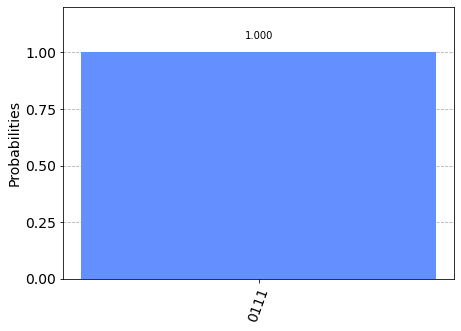

In [61]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

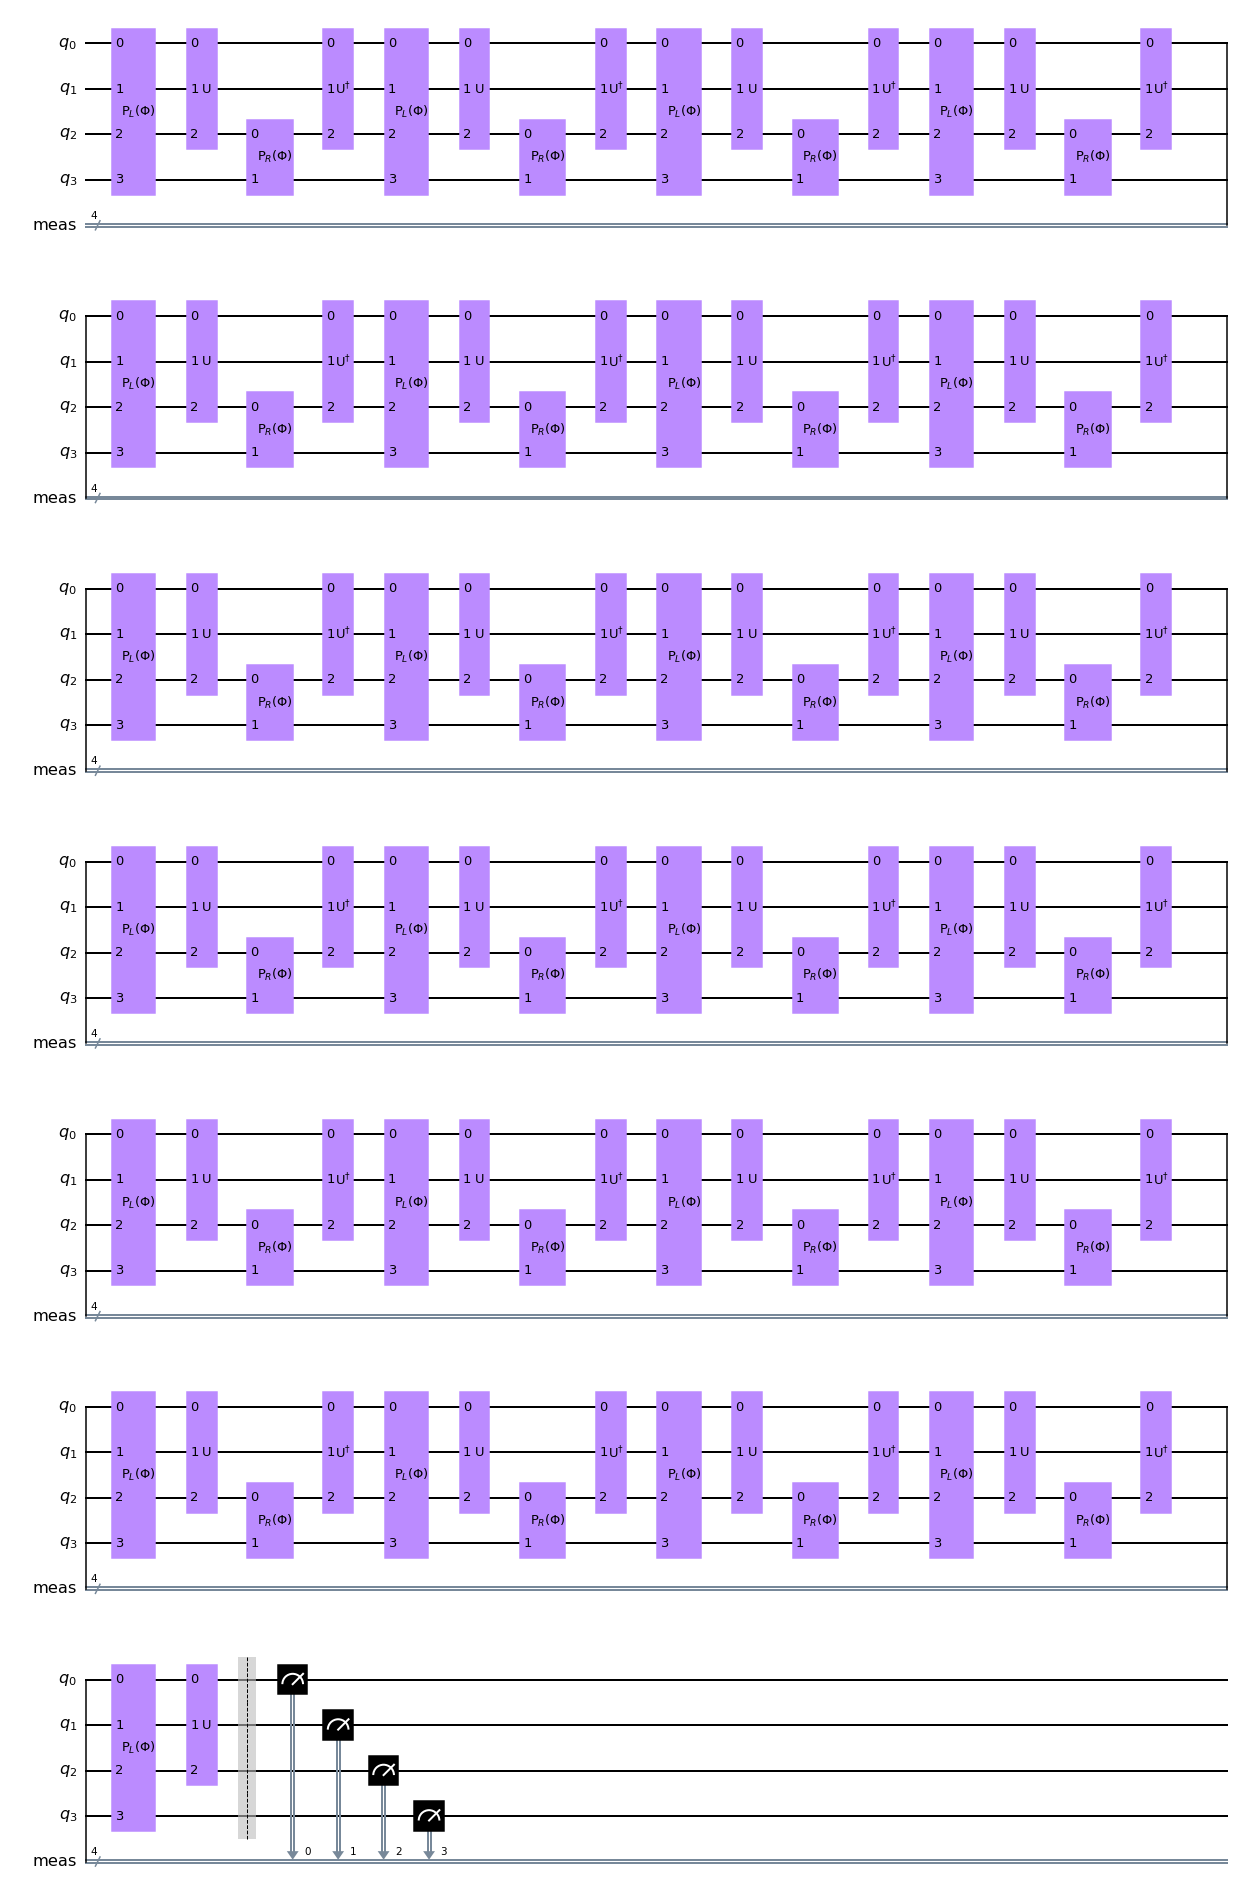

In [63]:
#fi values with d=100 for tanh(20*x) / 1.1
#solved with direct method ~c/2 from the QSP paper

tot = [-0.008477665649999966, 1.5798406127448965, 1.5611335548948966, 1.5811356823448965, 
      1.5597148605448965, 1.5826943673948966, 1.5579963940448966, 1.5845967940448966, 
      1.5558801334948966, 1.5869642588948965, 1.5532140680948965, 1.5899899698448965, 
      1.5497487064448965, 1.5940019420948965, 1.5450438018948967, 1.5996054165948965, 
      1.5382433274448966, 1.6080532066948965, 1.5274349775448965, 1.6224240912948966, 
      1.5073016952948965, 1.6528413257948966, 1.4555007362948966, 1.7634387747948965, -0.5786542749999999,
       -0.5786542749999999, 1.7634387747948965, 1.4555007362948966, 1.6528413257948966, 1.5073016952948965, 
              1.6224240912948966, 1.5274349775448965, 1.6080532066948965, 1.5382433274448966, 1.5996054165948965, 
              1.5450438018948967, 1.5940019420948965, 1.5497487064448965, 1.5899899698448965, 1.5532140680948965, 
              1.5869642588948965, 1.5558801334948966, 1.5845967940448966, 1.5579963940448966, 1.5826943673948966, 
              1.5597148605448965, 1.5811356823448965, 1.5611335548948966, 1.5798406127448965, -0.008477665649999966]


systemqubits = 2
nqubits = systemqubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)  

u = U(nqubits-1, nqubits)
u_dag = reverse_gate(u)

p_right_range = [nqubits-2, nqubits-1]
u_range = list(range(0, nqubits-1))
p_left_range = list(range(0, nqubits))

circuit.append(P_left(nqubits, nqubits, tot[0]), p_left_range)
circuit.append(U(nqubits-1, nqubits), u_range)

for i in range((len(tot)-1) // 2):
    circuit.append(P_right(tot[2*i + 1]), p_right_range) 
    circuit.append(u_dag, u_range)
    circuit.append(P_left(nqubits, nqubits, tot[2*i+2]), p_left_range)
    circuit.append(u, u_range)
    '''The i + 2 that used to be here will not affect the actual values of i
    I tried making i move in 2 and 3 steps each time, but actually,
    it moving in 1 steps gives the best results.'''
    
#circuit.append(p_right(tot[int(len(tot))-1]),[nqubits-2, nqubits-1]) 
#circuit.append(U_dag(nqubits-1),list(range(0,nqubits-1)))

circuit.measure_all()
circuit.draw(output="mpl")

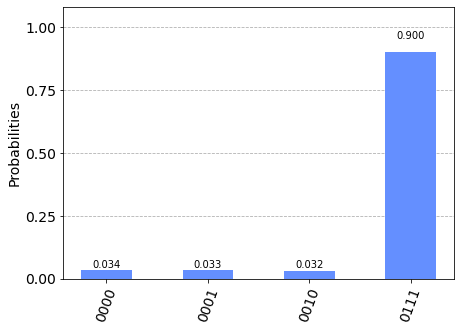

In [64]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

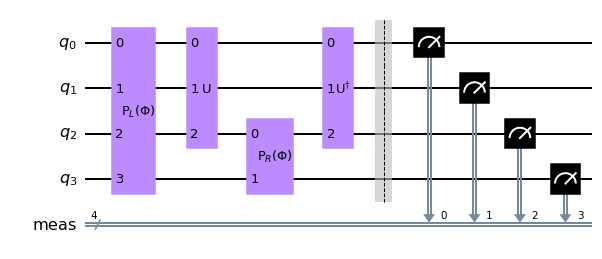

In [66]:
systemqubits = 2
nqubits = systemqubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)  

u = U(nqubits-1, nqubits)
u_dag = reverse_gate(u)

p_right_range = [nqubits-2, nqubits-1]
u_range = list(range(0, nqubits-1))
p_left_range = list(range(0, nqubits))

circuit.append(P_left(nqubits, nqubits, 0.11490348500000003), p_left_range)
circuit.append(u, u_range)

circuit.append(P_right(-0.38259884350000006), p_right_range)
circuit.append(u_dag, u_range)

circuit.measure_all()
circuit.draw(output="mpl")

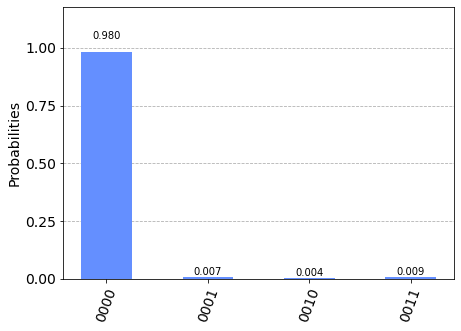

In [67]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, qasm_sim)
qobj = assemble(transpiled_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)